# **Final Project- Fake News Detection**
**CS 620 - Briana Johnson, Nick Carpenter**

Social media (e.g., Twitter and Facebook) has become a new ecosystem for spreading news. Unfortunately, social media is full of fake news. Fake news consists of information that is intentionally and verifiably false to mislead readers, which is motivated by chasing personal or organizational profits.

Fake news detection is done to determine the truthfulness of the news by analyzing the news contents and related information such as propagation patterns. It attracts a lot of attention to resolve this problem from different aspects, where supervised learning based fake news detection dominates this domain. The goal of this team project is to build classifiers via support vector machine (SVM), Random Forest, and Logistic Regression, and speed up the process with RAPIDS. It will require 2 ~ 3 student to complete this team project.

Fake News Detection Datasets: (https://www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets/data)

**About the Data**

The dataset contains two CSV files of articles containing real and fake news.

*  The first file named “True.csv” contains more than 12,600 articles from reuter.com.
*  The second file named “Fake.csv” contains more than 12,600 articles from different fake news outlet resources.
*  Each article contains the following information: article title, text, type and the date the article was published on.
*  To match the fake news data collected for kaggle.com, articles were mostly collected from 2016 to 2017.
*  The data collected were cleaned and processed, however, the punctuations and mistakes that existed in the fake news were kept in the text.



**Reference codes:**
*  (https://www.kaggle.com/code/satyamsss/fake-news-prediction-lstm-97-accurate)
*  (https://www.kaggle.com/code/omaraymanatia/fake-news-detection-nlp-using-nltk)
*  (https://www.kaggle.com/code/zimhadi1/logestic-reg-svm-naive-bayes-random-forset)





---


# PART I. Install Required Python packages


In [ ]:
#Import required libraries. Theres probably more here than used but ah well
#pandas and numpy
import pandas as pd
import numpy as np

#Other standard/ plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import time

#sklearn preprocessing (scalers to remove mean and scale unit variance and label encoder)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
#sklearn feature extraction with Term Frequency — Inverse Document Frequency (TFIDF)
from sklearn.feature_extraction.text import TfidfVectorizer
#sklearn model_selection for tuning parameters
from sklearn.model_selection import train_test_split
#sklearn metrics for accuracy testing and reports
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report, log_loss
#sklearn models (random forest, log reg, and svm)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
#sklearn SVM kernel approximation Nystroem
from sklearn.kernel_approximation import Nystroem
#sklearn pipeline
from sklearn.pipeline import Pipeline

#Natural language processing (NLP) from Natural Language Toolkit (NLTK) for stemming and stop word preprocessing
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize #not sure which tokenize used?
from nltk.util import trigrams
#download nltk packages
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))

#regular expression package for text cleaning (checks for specified pattern in strings)
import regex as re


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!




---


# PART II. Data Preprocessing



1.  Remove rows with missing values
2. Stemming (https://en.wikipedia.org/wiki/Stemming)
3. Remove stop words (https://en.wikipedia.org/wiki/Stop_word)
4. Split the samples into training and testing datasets with the ratio 0.2
5. Extract features with Term Frequency — Inverse Document Frequency
(TFIDF) (https://en.wikipedia.org/wiki/Tf–idf) to build samples




In [ ]:
#load the datasets using pandas read_csv and assign to proper names
df_fake = pd.read_csv('/content/Fake.csv')
df_true = pd.read_csv('/content/True.csv')


In [ ]:
#view the head rows of the true dataframe
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
#view the head rows of the fake dataframe
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
#Inspect the shapes and column data types of data frames again
#true dataframe
print('True News Dataset Shape:\n',df_true.shape,'\n')
print('True News Dataset Column Data types:\n',df_true.dtypes,'\n\n')
#test dataframe
print('Fake News Dataset Shape:\n',df_fake.shape,'\n')
print('Fake News Dataset Column Data types:\n',df_fake.dtypes,'\n\n')


True News Dataset Shape:
 (21417, 4) 

True News Dataset Column Data types:
 title      object
text       object
subject    object
date       object
dtype: object 


Fake News Dataset Shape:
 (23481, 4) 

Fake News Dataset Column Data types:
 title      object
text       object
subject    object
date       object
dtype: object 




**1. Remove rows with missing values**

and also do any other preprocessing before next main step

In [ ]:
# Check for missing values
print("Missing values in True.csv:\n", df_true.isnull().sum())
print("\nMissing values in Fake.csv:\n", df_fake.isnull().sum())

# Remove rows with missing values
df_true.dropna(inplace=True)
df_fake.dropna(inplace=True)

Missing values in True.csv:
 title      0
text       0
subject    0
date       0
dtype: int64

Missing values in Fake.csv:
 title      0
text       0
subject    0
date       0
dtype: int64


In [ ]:
#Inspect the shapes and column data types of data frames again
#true dataframe
print('True News Dataset Shape:\n',df_true.shape,'\n')
print('True News Dataset Column Data types:\n',df_true.dtypes,'\n\n')
#test dataframe
print('Fake News Dataset Shape:\n',df_fake.shape,'\n')
print('Fake News Dataset Column Data types:\n',df_fake.dtypes,'\n\n')

True News Dataset Shape:
 (21417, 4) 

True News Dataset Column Data types:
 title      object
text       object
subject    object
date       object
dtype: object 


Fake News Dataset Shape:
 (23481, 4) 

Fake News Dataset Column Data types:
 title      object
text       object
subject    object
date       object
dtype: object 




In [ ]:
#create separate labels for the true and fake datasets, with true as 0 and fake as 1
df_true['label'] = 0
df_fake['label'] = 1

In [ ]:
#merge the datasets, remove the subject and date columns, and reset the index
df = pd.concat([df_true, df_fake], axis=0).drop(['subject', 'date'], axis=1).reset_index(drop=True)

In [ ]:
#check if any of the columns have null values
df.isnull().sum()

,0
title,0
text,0
label,0


In [ ]:
#quickly view the concatenated dataframe in table view (see the head and tail) and ensure that the 0 or 1 label is preserved
df

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0
...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,1


In [ ]:
#create a new column that combines the title and text, separated by a space
#Common practice of combining text features before applying natural language processing techniques.
df['combined_text'] = df['title'] + ' ' + df['text']
df.head()

,title,text,label,combined_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0,Trump wants Postal Service to charge 'much mor...


In [ ]:
#Drop the original title and text rows and reset the index
df = df.drop(['title', 'text'], axis=1).reset_index(drop=True)
#quickly view the concatenated dataframe in table view (see the head and tail) and ensure that the 0 or 1 label is preserved
df

,label,combined_text
0,0,"As U.S. budget fight looms, Republicans flip t..."
1,0,U.S. military to accept transgender recruits o...
2,0,Senior U.S. Republican senator: 'Let Mr. Muell...
3,0,FBI Russia probe helped by Australian diplomat...
4,0,Trump wants Postal Service to charge 'much mor...
...,...,...
44893,1,McPain: John McCain Furious That Iran Treated ...
44894,1,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
44895,1,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
44896,1,How to Blow $700 Million: Al Jazeera America F...


In [ ]:
#Shuffle the rows of the combined dataframe and reset the index. See markdown cell below for more info
np.random.seed(42) # set a random seed for reproducibility (data will be shuffled same way every time code is run)
random_indexes = np.random.randint(0,len(df),len(df))
df = df.iloc[random_indexes].reset_index(drop=True)

Gemini: Shuffling the data is important to prevent bias during the training process. If the data is sorted in a specific order (e.g., all the "true" news articles followed by all the "fake" news articles), the model might learn from this order instead of the actual features of the data. This can lead to a model that performs well on the training data but poorly on new, unseen data. By shuffling the data, we ensure that the training, validation, and test sets are all representative of the overall distribution of the data.

In [ ]:
#quickly view the concatenated then shuffled dataframe in table view (see the head and tail)
#the label column should now have 1 and 0 in random arrangements
df

,label,combined_text
0,0,U.N. refugee commissioner says Australia must ...
1,0,Republican tax plan would deal financial hit t...
2,1,ATHEISTS SUE GOVERNOR OF TEXAS Over Display on...
3,1,Boiler Room #62 – Fatal Illusions Tune in to t...
4,0,Nigeria says U.S. agrees delayed $593 million ...
...,...,...
44893,0,"House tax chairman confident on reform, others..."
44894,1,‘Responsible Gun Owner’ Who Shot His Girlfrie...
44895,0,Connecticut governor eyes economic investments...
44896,1,WATCH: Jimmy Kimmel Hilariously WRECKS Trump ...


In [ ]:
#determine the longest sentence length in combined_text
def longest_sentence_length(text):
  return len(text.split())

df['maximum_length'] = df['combined_text'].apply(lambda x : longest_sentence_length(x))
print('longest sentence length in combined_text column -')
max_length = max(df['maximum_length'].values)
print(max_length)

longest sentence length in combined_text column -
8148


**2. Stemming (https://en.wikipedia.org/wiki/Stemming) and
3.Remove stop words (https://en.wikipedia.org/wiki/Stop_word)**

In [ ]:
# Text cleaning. See markdown cell below for more info
text_cleaning = "\b0\S*|\b[^A-Za-z0-9]+"

#preprocessing_filter function
def preprocess_filter(text, stem=False):
  text = re.sub(text_cleaning, " ",str(text.lower()).strip())
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        stemmer = SnowballStemmer(language='english')
        token = stemmer.stem(token)
      tokens.append(token)
  return " ".join(tokens)



*   The regular expression pattern removes non-alphanumeric characters and digits, enhancing text cleanliness for subsequent analysis.
*   Text preprocessing function standardizes text by converting it to lowercase, removing stop words, and optionally applying stemming, facilitating effective natural language processing.
*   Stemming simplifies words to their root forms, aiding in capturing underlying semantic meanings and improving search accuracy.
*   Removal of stop words reduces noise in text data, focusing on informative words and enhancing the quality of subsequent analysis.



In [ ]:
#replace combined text column with processed_text column where preprocess filter is applied
df['processed_text'] = df['combined_text'].apply(lambda x : preprocess_filter(x))
df = df.drop(['combined_text'], axis=1)
df.head()

,label,maximum_length,processed_text
0,0,565,u.n. refugee commissioner says australia must ...
1,0,426,republican tax plan would deal financial hit u...
2,1,315,atheists sue governor texas display capitol gr...
3,1,130,boiler room #62 – fatal illusions tune alterna...
4,0,294,nigeria says u.s. agrees delayed $593 million ...


**4. Split the samples into training and testing datasets with the ratio 0.2**

In [ ]:
#Assign input features (X) and target variables (Y) for the models
X = df['processed_text']
y = df['label']

#Split the data into training and testing sets using the training_test_split scikit function
#split training and testing with the ratio 0.2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**5. Extract features with Term Frequency — Inverse Document Frequency (TFIDF) (https://en.wikipedia.org/wiki/Tf–idf) to build samples**

In [ ]:
#use the TfidfVectorizer from scikit to convert the text data into a format that can be used by ML models
vectorizer = TfidfVectorizer(max_features=5000)
#max_features tells the vectorizer to only consider the top 5000 most frequently occurring words in the vocabulary.
#This helps to reduce the dimensionality of the data and focus on the most important words.
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)



---


# PART III. Building fake news detection models

Load training and testing data. Complete the fake news detection on testing data with these three models
and record the classification performance such as accuracy.
1.  Train a classifier 1 with traditional random forest from sklearn on the
training data and record the training time
2. Train a classifier 2 with traditional Logistic Regression from sklearn on the
training data and record the training time
3. Train a classifier 3 with traditional SVM from sklearn on the training data
and record the training time






In [ ]:
#create a Python dictionary named models to store the ML models and data in key-value pairs.
#keys are the string names of the models, values are the actual model objects from scikit
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='linear')
}


Training Random Forest...
Random Forest Training Time: 63.27 seconds
Random Forest Accuracy: 0.9996
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4381
           1       1.00      1.00      1.00      4599

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



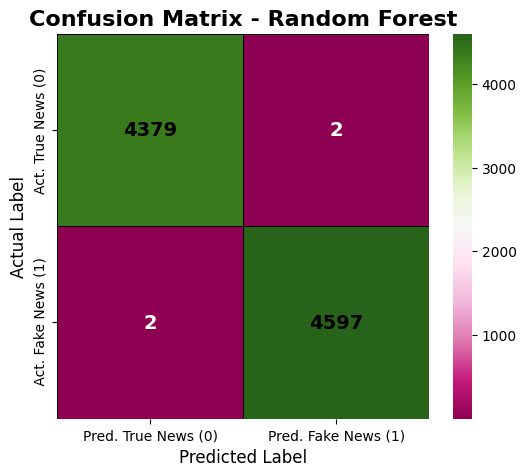


Training Logistic Regression...
Logistic Regression Training Time: 0.82 seconds
Logistic Regression Accuracy: 0.9915
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4381
           1       0.99      0.99      0.99      4599

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



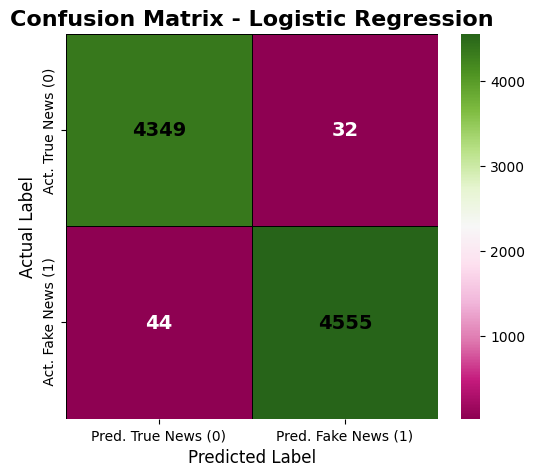


Training SVM...
SVM Training Time: 433.77 seconds
SVM Accuracy: 0.9979
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4381
           1       1.00      1.00      1.00      4599

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



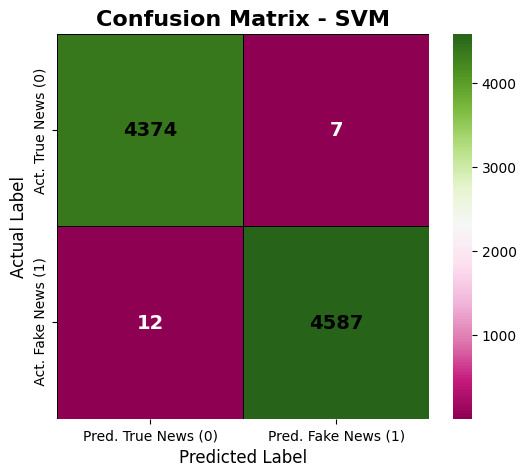

In [ ]:
from matplotlib.colors import ListedColormap

#Create empty dictionaries for model accuracies and training times
model_accuracies = {}
training_times = {}

#Create a for loop that loops through each ML model and creates
#run time, accuracy, classification report, and confusion matrix for each
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    training_times[model_name] = training_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy

    print(f"{model_name} Training Time: {training_time:.2f} seconds")
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix using pandas and seaborn
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=['Act. True News (0)', ' Act. Fake News (1)'], columns=['Pred. True News (0)', 'Pred. Fake News (1)'])

    plt.figure(figsize=(6, 5))

    # Define annotation colors
    annot_colors = np.array([['black', 'white'], ['white', 'black']])
    sns.heatmap(cm_df, annot=False, fmt='d', cmap='PiYG', linewidths=.5, linecolor='black') # Removed annot_kws and set annot to False

    # Manually set the text colors for each cell with specific formatting for the first and last
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            if (i == 0 and j == 0) or (i == cm.shape[0]-1 and j == cm.shape[1]-1):
                 plt.text(j + 0.5, i + 0.5, cm[i, j],
                     ha='center', va='center',
                     color='black',
                     size=14,
                     fontweight='bold')
            else:
                plt.text(j + 0.5, i + 0.5, cm[i, j],
                     ha='center', va='center',
                     color=annot_colors[i, j],
                     size=14,
                     fontweight='bold')

    plt.title(f'Confusion Matrix - {model_name}', size=16, fontweight='bold')
    plt.xlabel('Predicted Label', size=12)
    plt.ylabel('Actual Label', size=12)
    plt.show()



---


# PART IV. RESULTS- Compare the training time and the classification performance of the three classifiers

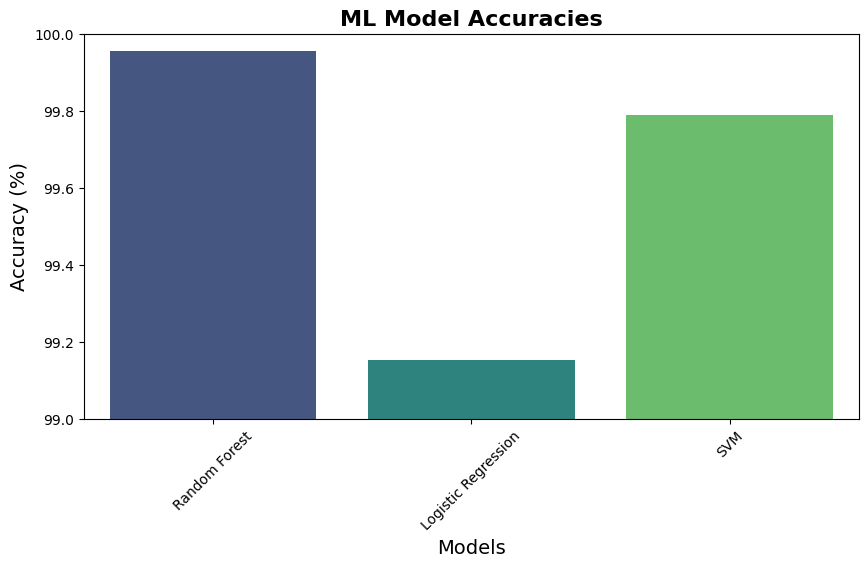

In [ ]:
#plot a bar chart of each model's accuracies using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x=list(model_accuracies.keys()), y=[acc * 100 for acc in model_accuracies.values()], palette='viridis', hue=list(model_accuracies.keys()), legend=False)
plt.xlabel("Models", size=14)
plt.ylabel("Accuracy (%)", size=14)
plt.title("ML Model Accuracies", size=16, fontweight='bold')
plt.xticks(rotation=45)
plt.ylim(99, 100) # Adjust y-axis to focus on the range of accuracies as percentages
plt.show()

/tmp/ipython-input-1507711929.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=[acc * 100 for acc in model_accuracies.values()], palette='viridis', alpha=0.7, ax=ax1)


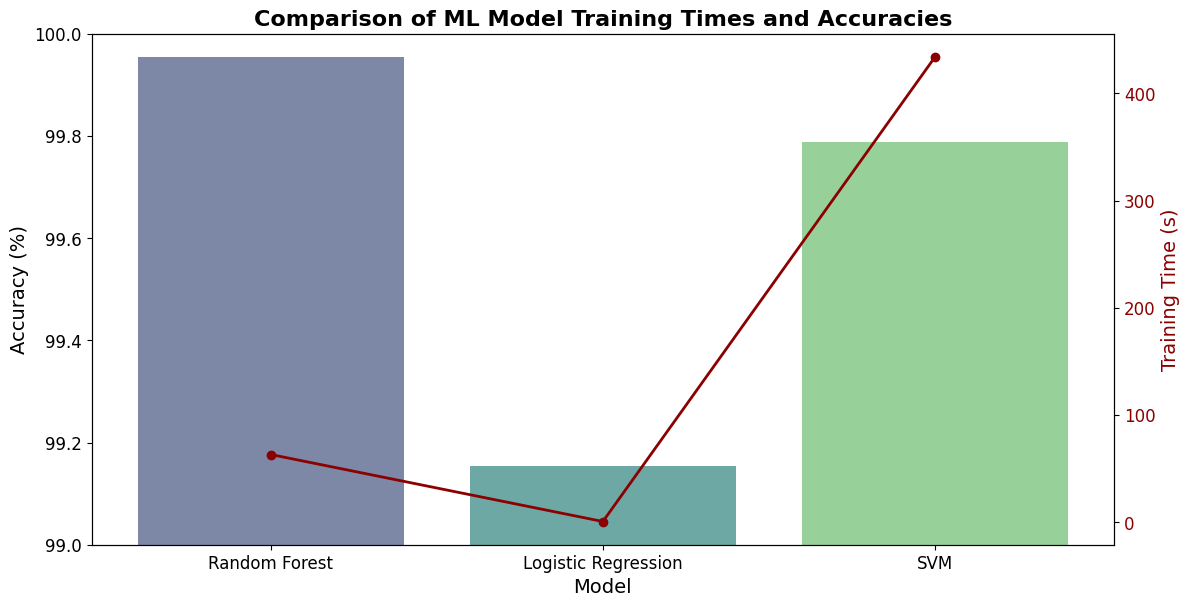

In [ ]:
#make a plot comparing the training time and classification performance of the three models
# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot accuracies on the primary y-axis as bars using seaborn.barplot
ax1.set_xlabel('Model', size=14)
ax1.set_ylabel('Accuracy (%)', size=14)
# Use the viridis colormap for the bars, matching the previous cell's coloring
sns.barplot(x=list(model_accuracies.keys()), y=[acc * 100 for acc in model_accuracies.values()], palette='viridis', alpha=0.7, ax=ax1)
ax1.tick_params(axis='y', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.set_ylim(99, 100) # Adjust y-axis limit for better visualization

# Create a second y-axis for training time
ax2 = ax1.twinx()
ax2.set_ylabel('Training Time (s)', color='darkred', size=14)
ax2.plot(training_times.keys(), training_times.values(), color='darkred', marker='o', linestyle='-', linewidth=2)
ax2.tick_params(axis='y', labelcolor='darkred', labelsize=12)
ax2.tick_params(axis='x', labelsize=12)


# Add a title and show the plot
fig.tight_layout()
plt.title('Comparison of ML Model Training Times and Accuracies', size=16, fontweight='bold')
plt.show()



---


# **🎯 BONUS PART: Test Prediction**
Just for fun, let's input the urls of different articles and see what label (true, 0, or fake, 1) each ML model assigns to it

# Task
Using the provided notebook, create a Python function that takes a news article URL as input. This function should:
1.  Fetch the HTML content of the article from the given URL.
2.  Extract the title and the main text of the article.
3.  Combine the extracted title and text into a single string.
4.  Preprocess this combined text using the same preprocessing steps applied to the main dataset in the notebook.
5.  Use the pre-trained machine learning models (already available in the notebook) to predict whether the news article is fake (1) or not fake (0).
6.  Finally, display the prediction results from each model.

## Install necessary libraries

### Subtask:
Install necessary libraries


**Reasoning**:
The subtask requires installing the `requests` and `BeautifulSoup4` libraries to fetch and parse HTML content from URLs. These are external libraries not typically included in a standard Python environment, so they need to be installed using pip.



In [ ]:
%pip install requests beautifulsoup4

## Fetch and parse the article

### Subtask:
Create a function that takes a URL, fetches its HTML content, and extracts the title and main text using BeautifulSoup.


**Reasoning**:
Define a function to fetch and parse article content from a given URL using requests and BeautifulSoup.



In [ ]:
import requests
from bs4 import BeautifulSoup

def get_article_content(url):
    """
    Fetches HTML content from a URL and extracts the article title and text.

    Args:
        url: The URL of the news article.

    Returns:
        A tuple containing the article title (str) and main text (str),
        or (None, None) if fetching or parsing fails.
    """
    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
        }
        response = requests.get(url, headers=headers, timeout=10) # Added timeout to prevent hanging
        response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)

        soup = BeautifulSoup(response.content, 'html.parser')

        # Attempt to find the title
        title = None
        title_tag = soup.find('title')
        if title_tag:
            title = title_tag.get_text()
        else:
            # Try common title tags/selectors if <title> is not descriptive enough
            title_tag = soup.select_one('h1')
            if title_tag:
                title = title_tag.get_text()


        # Attempt to find the main article text. This is highly dependent on website structure.
        # This is a basic attempt, and may need refinement for specific websites.
        article_text = []
        # Look for common tags containing article content
        paragraphs = soup.find_all('p')
        for p in paragraphs:
            article_text.append(p.get_text())

        main_text = " ".join(article_text)

        return title, main_text

    except requests.exceptions.RequestException as e:
        print(f"Error fetching article from {url}: {e}")
        return None, None
    except Exception as e:
        print(f"Error parsing article from {url}: {e}")
        return None, None

# Example usage (commented out):
# url = "https://www.theonion.com/exxonmobil-ceo-relieved-it-finally-too-late-to-do-anyth-1819578782"
# title, text = get_article_content(url)
# if title and text:
#     print("Title:", title)
#     print("Text:", text)

## Preprocess the text and Predict Classification with Trained Models

### Subtask:
Preprocess the extracted article text using the same preprocessing function (`preprocess_filter`) used for the training data.

After cleaninging and preparing article text for prediction, create a new function that takes a URL as input and performs all the steps: fetching the article, extracting the content, preprocessing the text, and making predictions with our trained models.

Some sample URLs to use...

"Fake" articles from 2016 (The Onion):
*   ( https://theonion.com/exxonmobil-ceo-relieved-it-finally-too-late-to-do-anyth-1819578782/ )
*   ( https://theonion.com/clinton-campaign-treasurer-crushed-to-death-after-stack-1819578773/ )
*   ( https://theonion.com/new-uber-update-allows-users-to-file-lawsuit-against-co-1819578934/ )

"True" articles (Reuters, which was used in the source dataset, gives a client retrieval error so these ones are articles on other websites with similar headlines also posted on Reuters):


*   ( https://www.yahoo.com/news/trump-sign-executive-order-fundamentally-170049685.html ) -Note, original Reuters article gives client retrieval error so the same/ similar article posted on Yahoo was used
*   ( https://www.reuters.com/graphics/USA-TRUMP/PUBLIC-LANDS/zdpxkxdwnvx/ ) -Graphics Reuters articles don't give errors
*   ( https://abcnews.go.com/Politics/messages-yemen-war-plans-inadvertently-shared-reporter-timeline/story?id=120128447 ) - Not a Reuters article, but I wanted an example of a true news story that sounded fake




In [ ]:
# Example URL
url = "https://abcnews.go.com/Politics/messages-yemen-war-plans-inadvertently-shared-reporter-timeline/story?id=120128447"

# Get article content
title, text = get_article_content(url)

if title and text:
    # Combine title and text
    combined_text = title + " " + text

    # Preprocess the combined text
    processed_text = preprocess_filter(combined_text)

    # Transform the preprocessed text using the trained TfidfVectorizer
    text_vectorized = vectorizer.transform([processed_text])

    # Predict using each model
    print('Article Title: ', title)
    for model_name, model in models.items():
        prediction = model.predict(text_vectorized)
        print(f"Prediction from {model_name}: {'Fake News' if prediction[0] == 1 else 'News is *Not* Fake'}")

Article Title:  Messages with Yemen war plans inadvertently shared with reporter: A timeline of the Signal mishap - ABC News
Prediction from Random Forest: Fake News
Prediction from Logistic Regression: News is *Not* Fake
Prediction from SVM: News is *Not* Fake
